<a href="https://colab.research.google.com/github/Femonello/bootcamp-data-analytics/blob/main/Desafio_Final_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Fernanda_Monello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Final: Correlação e Regressão**

Previsão de preços de imóveis

In [37]:

# Importando bibliotecas

#Dados
import pandas as pd
import numpy as np
import datetime

#Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#Estatística
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols
from sklearn.preprocessing import PowerTransformer

#Outros
import warnings
warnings.filterwarnings("ignore")


In [3]:
# importando a base de dados partir da URL do id do arquivo compartilhado

id_do_arquivo = "1Sj5KFTBjXKeSY5_F-BO3FnsN-3Erwdum" # ID arquivo kc_house_data.csv
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'

df_house = pd.read_csv(url)

id_do_arquivo = "11rIDsC_68K1eMSsuqeeUcQpw59-uuDgi" # ID arquivo car_price.csv
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'

df_car = pd.read_csv(url)


## **Exploração do dataset (ETL) - kc_house_data.csv**

In [4]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Excluimdo coluna id, não necessária para a análise
df_house.drop(columns=['id'], inplace=True)
df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df_house.shape

(9999, 20)

In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9999 non-null   object 
 1   price          9999 non-null   float64
 2   bedrooms       9999 non-null   int64  
 3   bathrooms      9999 non-null   float64
 4   sqft_living    9999 non-null   int64  
 5   sqft_lot       9999 non-null   int64  
 6   floors         9999 non-null   float64
 7   waterfront     9999 non-null   object 
 8   view           9999 non-null   int64  
 9   condition      9999 non-null   int64  
 10  grade          9999 non-null   int64  
 11  sqft_above     9999 non-null   int64  
 12  sqft_basement  9999 non-null   int64  
 13  yr_built       9999 non-null   int64  
 14  yr_renovated   9999 non-null   int64  
 15  zipcode        9999 non-null   int64  
 16  lat            9999 non-null   float64
 17  long           9999 non-null   float64
 18  sqft_liv

In [8]:
# Conversão de dados

# conversão de coluna date
df_house['date'] = pd.to_datetime(df_house['date'])

# conversão colunas bathrooms,  floors para inteiro
df_house['bathrooms'] = df_house['bathrooms'].astype(int)
df_house['floors'] = df_house['floors'].astype(int)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           9999 non-null   datetime64[ns]
 1   price          9999 non-null   float64       
 2   bedrooms       9999 non-null   int64         
 3   bathrooms      9999 non-null   int64         
 4   sqft_living    9999 non-null   int64         
 5   sqft_lot       9999 non-null   int64         
 6   floors         9999 non-null   int64         
 7   waterfront     9999 non-null   object        
 8   view           9999 non-null   int64         
 9   condition      9999 non-null   int64         
 10  grade          9999 non-null   int64         
 11  sqft_above     9999 non-null   int64         
 12  sqft_basement  9999 non-null   int64         
 13  yr_built       9999 non-null   int64         
 14  yr_renovated   9999 non-null   int64         
 15  zipcode        9999 n

In [9]:
#vrificando dados nulos
df_house.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [10]:
#Resumo das estatisticas do dataset
df_house.drop(columns=['date']).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5.334366e+05,3.361636,1.703770,2053.088209,1.603696e+04,1.380638,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,3.770547e+05,0.916079,0.728809,911.227082,4.504326e+04,0.520561,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,3.150000e+05,3.000000,1.000000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,6.399500e+05,4.000000,2.000000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000




> ⚠ **Aqui podemos verificar que a nossa variável target price tem uma escala bem maior que os demais dados, sendo recomendável realizar transformações não lineares. Contudo, vamos avaliar inicialmente os gráficos para avaliar qual a melhor transformação e se há necessidade de aplicá-la a mais alguma váriavel de interesse tal qual: sqft_living, sqft_lot, sqft_above e sqft_basement**



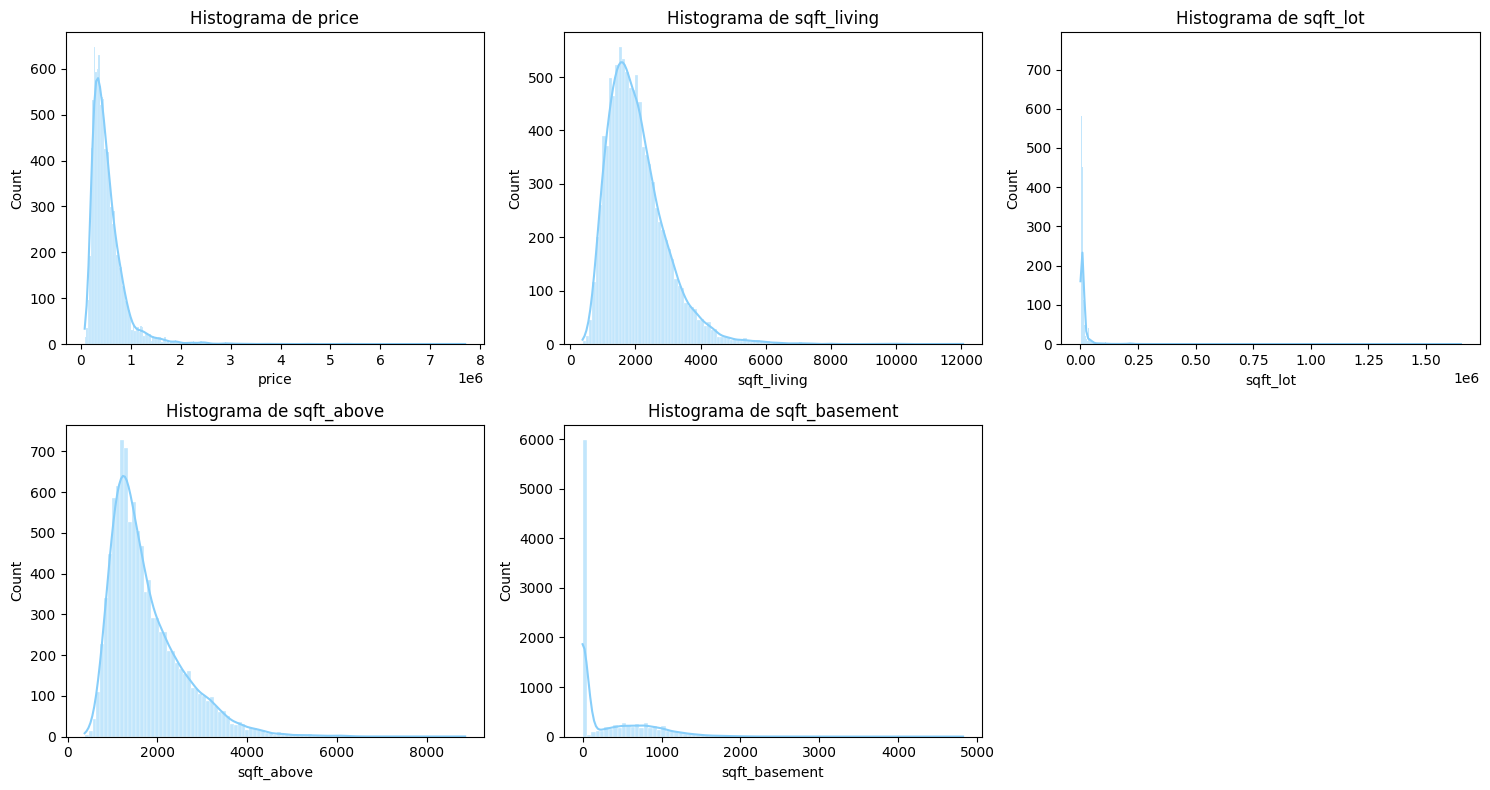

In [11]:
# Avaiando o formato das curvas dos histogramas das variaveis price, sqft_living, sqft_lot, sqft_above e sqft_basement

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# varifica caad uma das variáveis para criação do gráfico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda há subplots
        sns.histplot(df_house[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots não utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


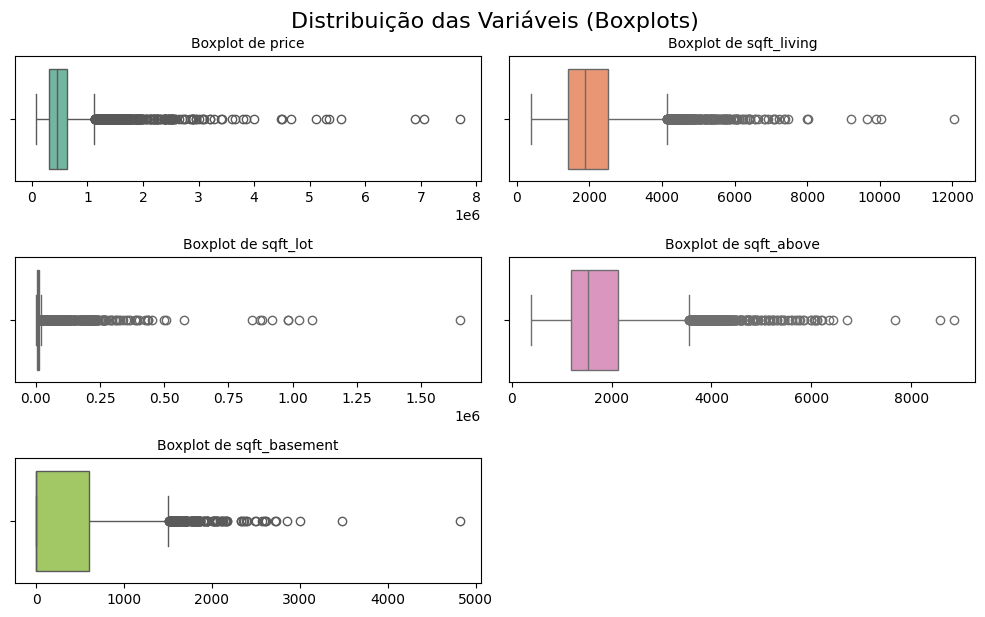

In [12]:
# Variáveis e cores
variables = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
colors = sns.color_palette("Set2", len(variables))

# Criando subplots em grade 3x2 (com espaço para até 6 variáveis)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
axes = axes.flatten()  # Transforma em lista para indexar facilmente

# Criando os boxplots
for i, var in enumerate(variables):
    sns.boxplot(x=df_house[var], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Boxplot de {var}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remover eixo extra não utilizado (posição 6)
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

# Ajuste de layout
plt.tight_layout()
plt.suptitle("Distribuição das Variáveis (Boxplots)", fontsize=16, y=1.02)
plt.show()




> ▶ **Podemos confirmar através dos histogramas que os dados apresentam assimetria, sendo recomendada a aplicação de transformações não lineares. Além disso, o boxplot indica presença de outliers nas variáveis, que podem influenciar na analise.**



In [13]:

# Aplicando transformações logarítmicas (adiciona +1 para evitar log(0))
df_house['log_price'] = np.log(df_house['price'])
df_house['log_sqft_living'] = np.log(df_house['sqft_living'])
df_house['log_sqft_lot'] = np.log(df_house['sqft_lot'])
df_house['log_sqft_above'] = np.log(df_house['sqft_above'])
df_house['log_sqft_basement'] = np.log(df_house['sqft_basement'])

# transformar ano em "idade da casa"
df_house['house_age'] = 2025 - df_house['yr_built']


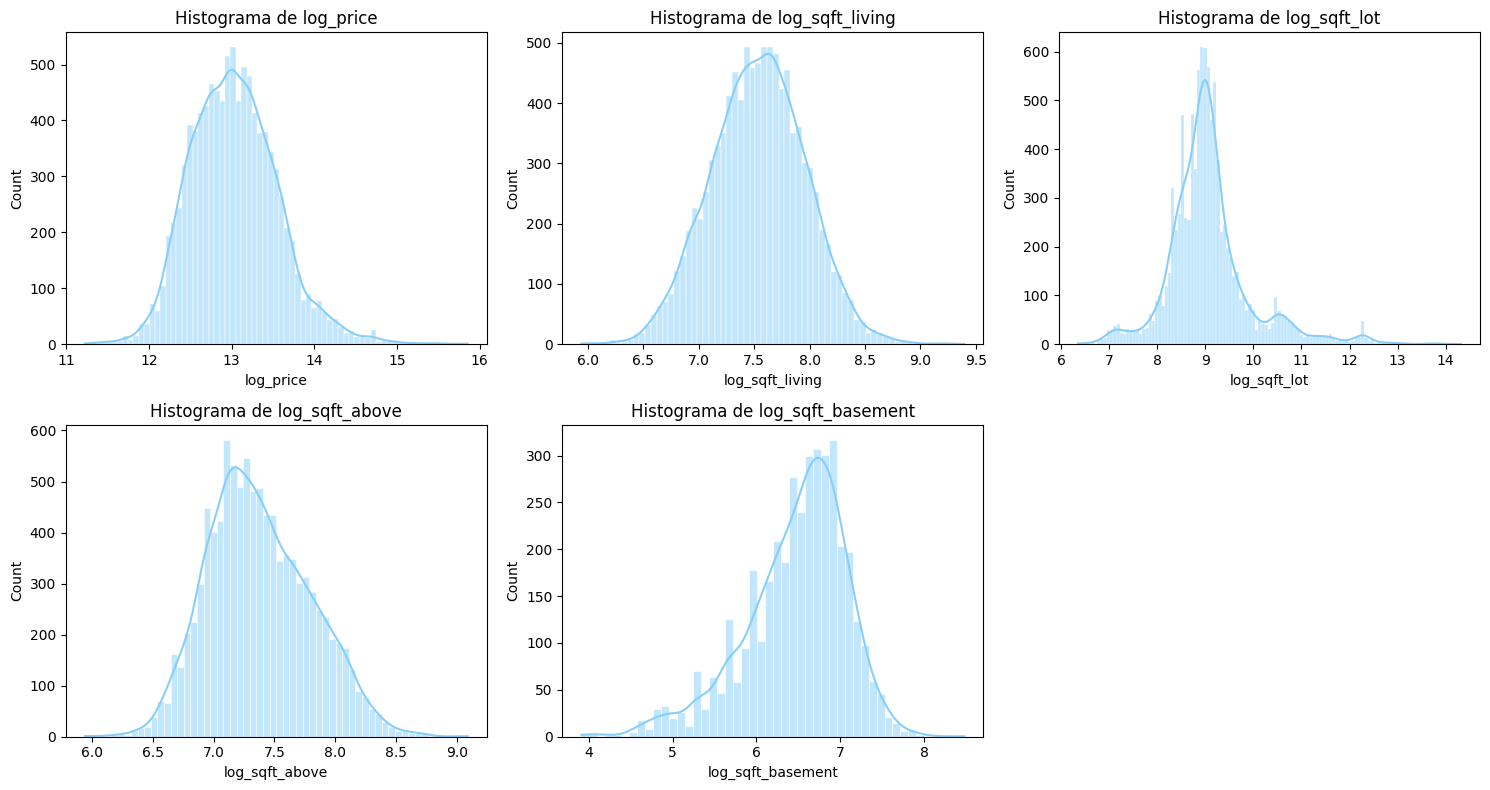

In [14]:
# Avaiando o formato das curvas dos histogramas das variaveis price, sqft_living, sqft_lot, sqft_above e sqft_basement

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['log_price', 'log_sqft_living', 'log_sqft_lot','log_sqft_above', 'log_sqft_basement']

# varifica caad uma das variáveis para criação do gráfico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda há subplots
        sns.histplot(df_house[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots não utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Questão 1

Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

### **Matriz de Correlação**

Correlação com o Preço (normalizado):
bedrooms             0.339992
bathrooms            0.507253
sqft_living          0.689118
sqft_lot             0.106508
floors               0.299405
view                 0.350063
condition            0.055714
grade                0.693329
sqft_above           0.598629
sqft_basement        0.316078
yr_built             0.055001
yr_renovated         0.128458
zipcode             -0.044108
lat                  0.455307
long                 0.040045
sqft_living15        0.628375
sqft_lot15           0.104223
log_sqft_living      0.667759
log_sqft_lot         0.146478
log_sqft_above       0.583121
log_sqft_basement    0.338800
house_age           -0.055001
Name: log_price, dtype: float64


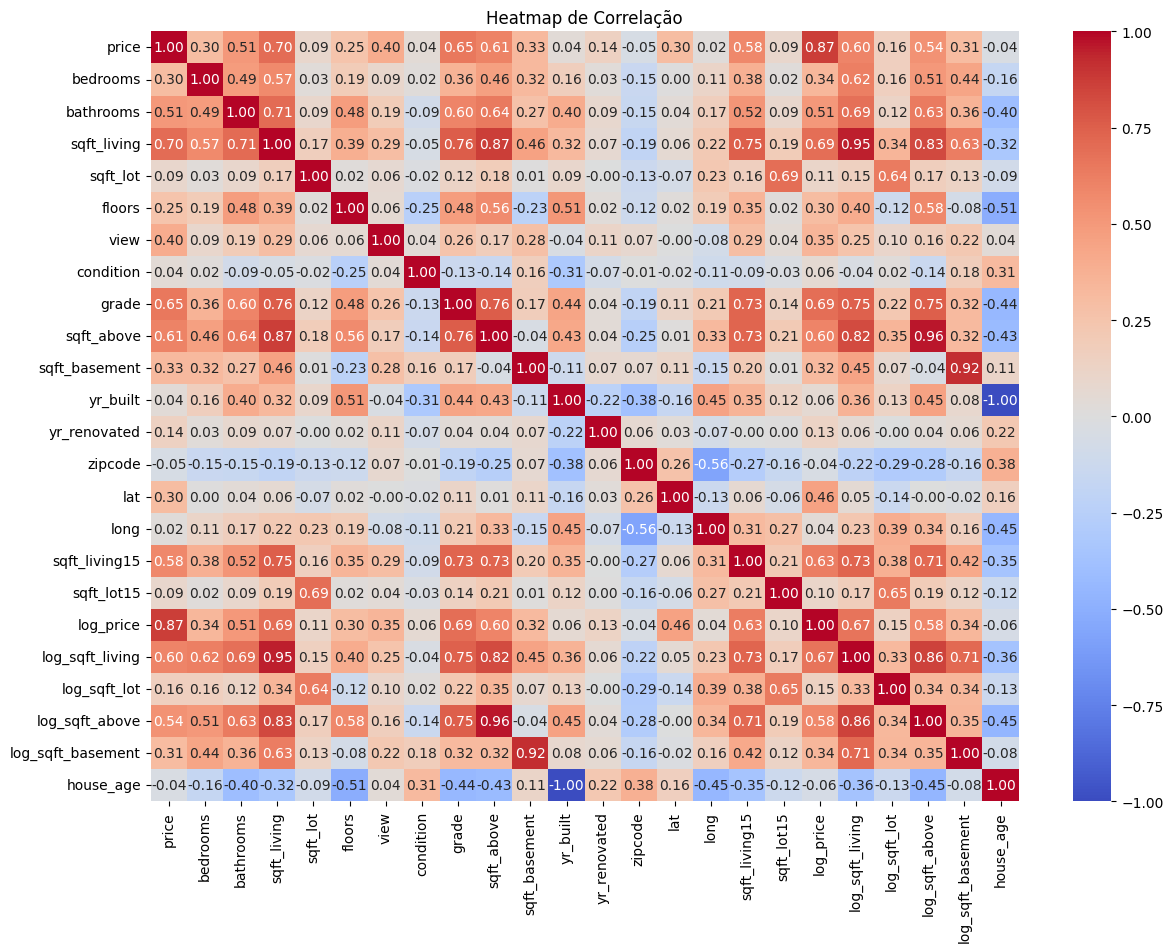

In [15]:
# Correlação de todas as variáveis numéricas com 'price'

# Selecionando apenas colunas numéricas para o cálculo da correlação
numerical_df = df_house.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

price_correlation = correlation_matrix['log_price'].drop(index=['log_price','price'])

print("Correlação com o Preço (normalizado):")
print(price_correlation)

# Heatmap de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()




### Correlação entre preço (normalizado) e bedrooms

In [16]:
#filtrando correlação entre log_price e bedrooms
cor_bedrooms = correlation_matrix.loc['log_price', 'bedrooms']
print(f"Correlação entre log_price e bedrooms: {cor_bedrooms:.4f}")

Correlação entre log_price e bedrooms: 0.3400


### Diferença na correlação de preço normalizado considerando sqft_living (Área interna útil da casa) superior a 2000 pés quadrados

In [17]:
# Verificando se há diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados

# Filtrando casas com sqft_living > 2000
df_filtrado = df_house[df_house['sqft_living'] > 2000]

# Recalculando a matriz de correlação para o conjunto filtrado
num_df_filtrado = df_filtrado.select_dtypes(include=np.number)
correlation_matrix_filtro = num_df_filtrado.corr()

# Correlação entre log_price e bedrooms no conjunto filtrado
cor_bedrooms_filtered = correlation_matrix_filtro.loc['log_price', 'bedrooms']

print(f"Correlação entre log_price e bedrooms (sqft_living > 2000): {cor_bedrooms_filtered:.4f}")

# Comparando as correlações
print(f"Diferença na correlação: {cor_bedrooms - cor_bedrooms_filtered:.4f}")


Correlação entre log_price e bedrooms (sqft_living > 2000): 0.0939
Diferença na correlação: 0.2461


## Questão 2

Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [18]:
# Filtrar casas com pelo menos 2 banheiros
df_bath2 = df_house[df_house['bathrooms'] >= 2]

# Calcular a correlação entre preço e área (original e transformada)
cor_price_sqft = df_bath2['price'].corr(df_bath2['sqft_living'])
cor_log_price_log_sqft = df_bath2['log_price'].corr(df_bath2['log_sqft_living'])

print(f"Correlação entre price e sqft_living (com bathrooms >= 2): {cor_price_sqft:.4f}")
print(f"Correlação entre log_price e log_sqft_living (com bathrooms >= 2): {cor_log_price_log_sqft:.4f}")


Correlação entre price e sqft_living (com bathrooms >= 2): 0.7067
Correlação entre log_price e log_sqft_living (com bathrooms >= 2): 0.6754


## Questão 3

Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [19]:
# Criar um dicionário para armazenar as correlações
correlations_by_bathrooms = {}

# Percorrer cada quantidade única de banheiros
for b in sorted(df_house['bathrooms'].unique()):
    subset = df_house[df_house['bathrooms'] == b]
    if len(subset) >= 30:  # Garantir número mínimo de casas para dar robustez à correlação
        corr = subset['sqft_living'].corr(subset['log_price'])
        correlations_by_bathrooms[b] = corr

# Exibir resultados
print("Correlação entre sqft_living e log_price por número de banheiros:")
for baths, corr in correlations_by_bathrooms.items():
    print(f"{baths} banheiros: correlação = {corr:.4f}")



Correlação entre sqft_living e log_price por número de banheiros:
0 banheiros: correlação = 0.5939
1 banheiros: correlação = 0.4433
2 banheiros: correlação = 0.5842
3 banheiros: correlação = 0.6302
4 banheiros: correlação = 0.6448


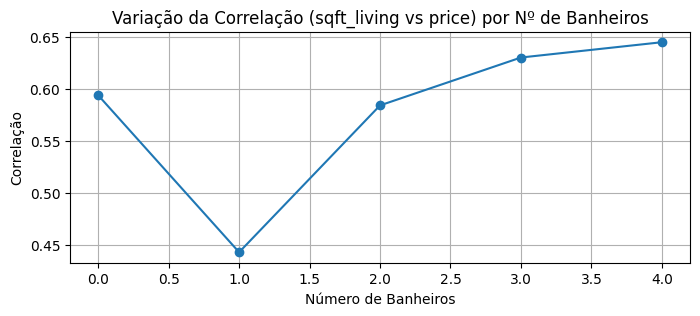

In [20]:
#Visualização gráfica

plt.figure(figsize=(8, 3))
plt.plot(list(correlations_by_bathrooms.keys()), list(correlations_by_bathrooms.values()), marker='o')
plt.title('Variação da Correlação (sqft_living vs price) por Nº de Banheiros')
plt.xlabel('Número de Banheiros')
plt.ylabel('Correlação')
plt.grid(True)
plt.show()

## **Questão 4**

Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [21]:
# Filtrar casas com sqft_living > 3000
df_big = df_house[df_house['sqft_living'] > 3000]

# Agrupar por condição e calcular estatísticas
condition_price_stats = df_big.groupby('condition')['log_price'].agg(['mean', 'median', 'count']).sort_index()

print("Estatísticas de preço por condição da casa (apenas casas > 3000 sqft):")
print(condition_price_stats)



Estatísticas de preço por condição da casa (apenas casas > 3000 sqft):
                mean     median  count
condition                             
2          13.461888  13.461888      2
3          13.703615  13.655048    944
4          13.742246  13.687677    269
5          13.949482  14.006131    101


In [22]:

# Criar listas de preços por condição
groups = [df_big[df_big['condition'] == c]['price'] for c in sorted(df_big['condition'].unique())]

# Teste ANOVA
anova_result = f_oneway(*groups)

print(f"ANOVA F={anova_result.statistic:.4f}, p-value={anova_result.pvalue:.4e}")

if anova_result.pvalue < 0.05:
    print("Há diferença estatística significativa entre os preços médios das diferentes condições, ou seja a condição da casa é relevante para o preço.")
else:
    print("Não há diferença estatística significativa entre os preços médios das diferentes condições, ou seja, a condição da casa não é relevante para o preço.")

ANOVA F=5.4687, p-value=9.7933e-04
Há diferença estatística significativa entre os preços médios das diferentes condições, ou seja a condição da casa é relevante para o preço.


## **Questão 5**

Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?



> ** Nessa questão, a latitude e longitude individualmente não irão capiturar bem a influência da localização geográfica no preço uma vez que, por serem coordenadas, só  têm  significado quando combinadas. Neste caso, para uma avaliação mais precisa da correlação, o dado será clusterizado, a a analise será feita com base na média dos dados de cada cluster**



                  mean  count
geo_cluster                  
0            13.419162   2044
2            13.264971   2395
3            13.240367    962
4            12.670194   1698
1            12.652347   1513


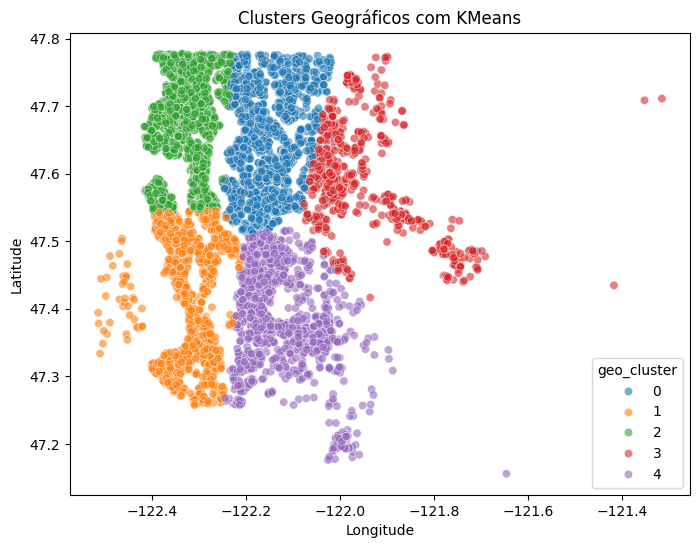

In [23]:
# Filtrar casas com 3 ou mais quartos
df_bedrooms3plus = df_house[df_house['bedrooms'] >= 3]

# Usar apenas latitude e longitude
coords = df_bedrooms3plus[['lat', 'long']]

# Definir número de clusters (ex: 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df_bedrooms3plus['geo_cluster'] = kmeans.fit_predict(coords)

# Ver preço médio por cluster
cluster_prices = df_bedrooms3plus.groupby('geo_cluster')['log_price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(cluster_prices)

# Plotando os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_bedrooms3plus, x='long', y='lat', hue='geo_cluster', palette='tab10', alpha=0.6)
plt.title('Clusters Geográficos com KMeans')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [24]:

# ANOVA: preço ~ cluster geográfico
model = ols('log_price ~ C(geo_cluster)', data=df_bedrooms3plus).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print("Resultado da ANOVA entre geo_cluster e price:")
print(anova_result)


Resultado da ANOVA entre geo_cluster e price:
                     sum_sq      df            F  PR(>F)
C(geo_cluster)   903.359281     4.0  1316.986775     0.0
Residual        1475.947496  8607.0          NaN     NaN


> **🔍 Interpretação do Resultado**
* **F = 1316.99 (muito alto)**
* **p-valor (PR(>F)) = 0.0 (menor que 0.05)**
* **df (graus de liberdade) = 4 (entre grupos) e df= 8607 (resíduo)**
* **Conclusão estatística	Rejeita-se H₀: os grupos têm médias diferentes de preço**

**✅ Conclusão: A localização geográfica (representada pelos clusters criados a partir de lat e long) influencia significativamente o preço das casas.**





## **Questão 6**

Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.

In [25]:
# ANOVA: preço ~ presença de waterfront
model = ols('log_price ~ C(waterfront)', data=df_house).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print("Resultado da ANOVA entre waterfront e price:")
print(anova_result)


Resultado da ANOVA entre waterfront e price:
                    sum_sq      df           F        PR(>F)
C(waterfront)   101.016603     1.0  376.387013  2.458235e-82
Residual       2683.044171  9997.0         NaN           NaN


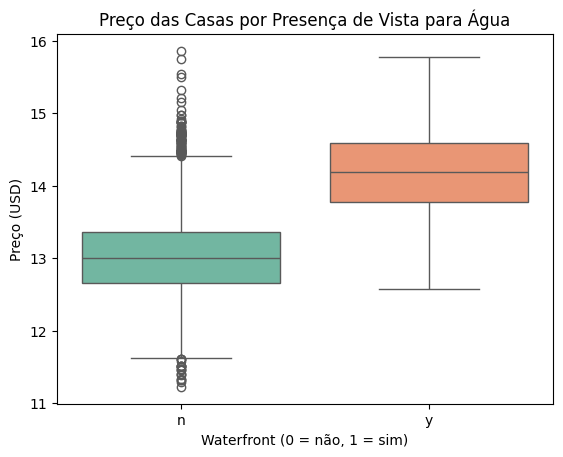

In [26]:
#Visualização da média dos valores para os dois grupos
sns.boxplot(x='waterfront', y='log_price', data=df_house, palette="Set2")
plt.title("Preço das Casas por Presença de Vista para Água")
plt.xlabel("Waterfront (0 = não, 1 = sim)")
plt.ylabel("Preço (USD)")
plt.show()


>  **🔍 Interpretação do Resultado**
* **F-valor	376.39 (muito alto)**
* **p-valor (PR(>F))	2.46 × 10⁻⁸² (quase zero)**
* **Conclusão estatística	Rejeita-se H₀ – há diferença significativa**

**✅ Conclusão:Casas com vista para a água têm preços significativamente diferentes do que casas sem essa característica. Através da análise das médias dos dois grupos, pode-se notar que casas com waterfont, apresentam mediana de preços superior**


## **Exploração do dataset (ETL) - car_prices.csv**

In [27]:
df_car.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


In [28]:
df_car.shape

(1874, 20)

In [29]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [30]:
#convertendo variaveis year em categórica e Sating capacity em int

df_car['Year'] = df_car['Year'].astype(str)
df_car['Seating Capacity'] = df_car['Seating Capacity'].astype(int)

# Criando coluna de idade do vaiculo
current_year = datetime.datetime.now().year
df_car['Age'] = current_year - df_car['Year'].astype(int)

df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   object 
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [31]:
# verificando dados nulos
df_car.isnull().sum()


,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


In [32]:
#Resumo das estatisticas do dataframe

df_car.describe()

,Price,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age
count,1.874000e+03,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343,8.286553
std,2.426090e+06,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250,3.138477
min,4.900000e+04,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000,3.000000
25%,5.000000e+05,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000,6.000000
50%,8.424995e+05,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000,8.000000
75%,1.908250e+06,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000,10.000000
max,3.500000e+07,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000,37.000000


> ⚠ **Aqui podemos verificar que a nossa variável target price tem uma escala bem maior que os demais dados, sendo recomendável realizar transformações não lineares. Contudo, vamos avaliar inicialmente os gráficos para avaliar qual a melhor transformação**

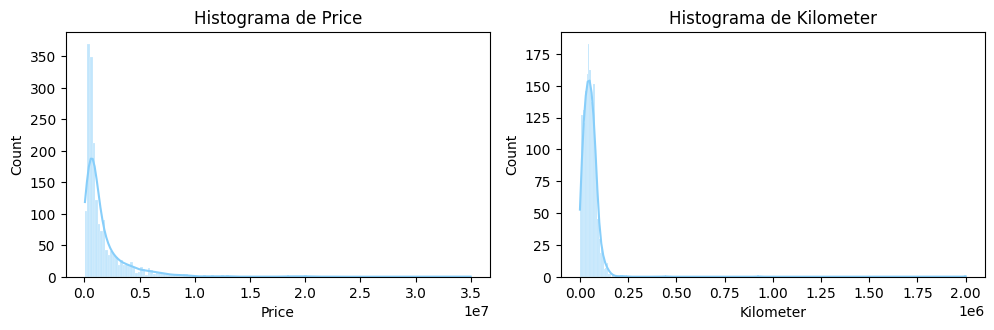

In [40]:
# Avaiando o formato das curvas dos histogramas das variaveis price e Kilometer

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['Price', 'Kilometer']

# varifica caad uma das variáveis para criação do gráfico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda há subplots
        sns.histplot(df_car[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots não utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


> ▶ **Podemos confirmar através dos histogramas que os dados apresentam assimetria, sendo recomendada a aplicação de transformações não lineares. Além disso, o boxplot indica presença de outliers nas variáveis, que podem influenciar na analise.**

In [34]:
# Aplicando transformações logarítmicas (adiciona +1 para evitar log(0))
df_car['log_price'] = np.log(df_car['Price'])

pt = PowerTransformer(method='yeo-johnson')
df_car['yeoj_kilometer'] = pt.fit_transform(df_car[['Kilometer']])


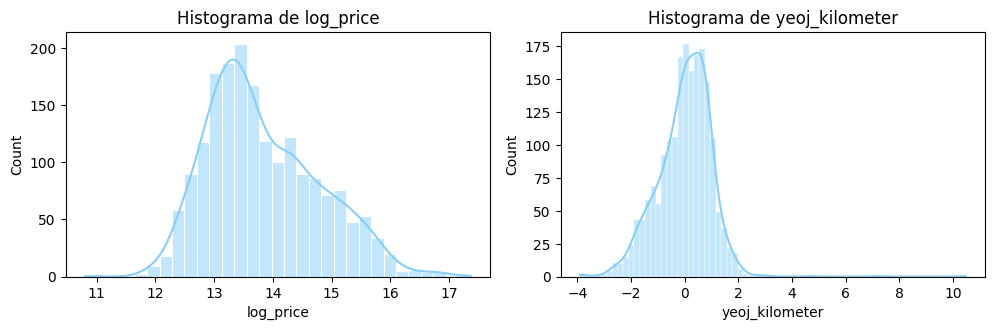

In [41]:
# Revisando o formato das curvas dos histogramas das variaveis transformadas

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['log_price', 'yeoj_kilometer']

# varifica caad uma das variáveis para criação do gráfico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda há subplots
        sns.histplot(df_car[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots não utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## **Questão 7:**

Codifique e exiba a matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

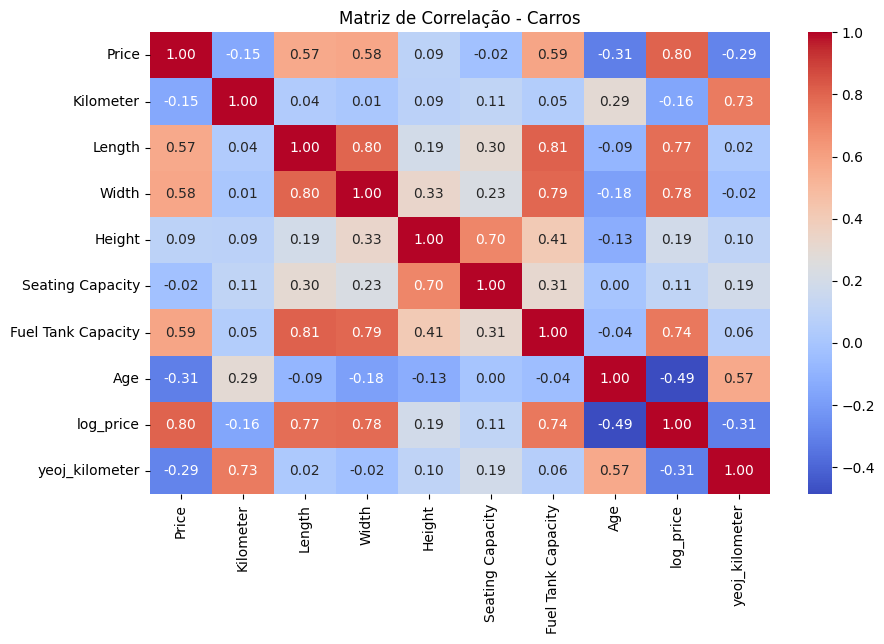

In [43]:
# Selecionando apenas colunas numéricas
numerical_car = df_car.select_dtypes(include=np.number)

# Calculando matriz de correlação
correlation_car = numerical_car.corr()

# Exibindo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_car, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Carros')
plt.show()



> ✅**Conclusão: Como exemplo de correlações positivas temos Pprice e log_price (preço normalizado) e Length, apresentando respectivamente correção de 0,57  e 0,77. O mesmo para as duas variaveis em relação à Width, 0,58 em relação à Price e 0,78 em relação a log_price (preço normalizado).
Correção negativa forte temos Age (idade do veiculo) e log_price (preço normalizado) e moderada entre log_price(preço normalizado) e yeoj_kilometer (kilometer normalizado)
O conjunto de dados apresenta como correlação nula o número de acentos (Seating capacity) e Age (idade do veículo)**



# **Questão 8**
Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price

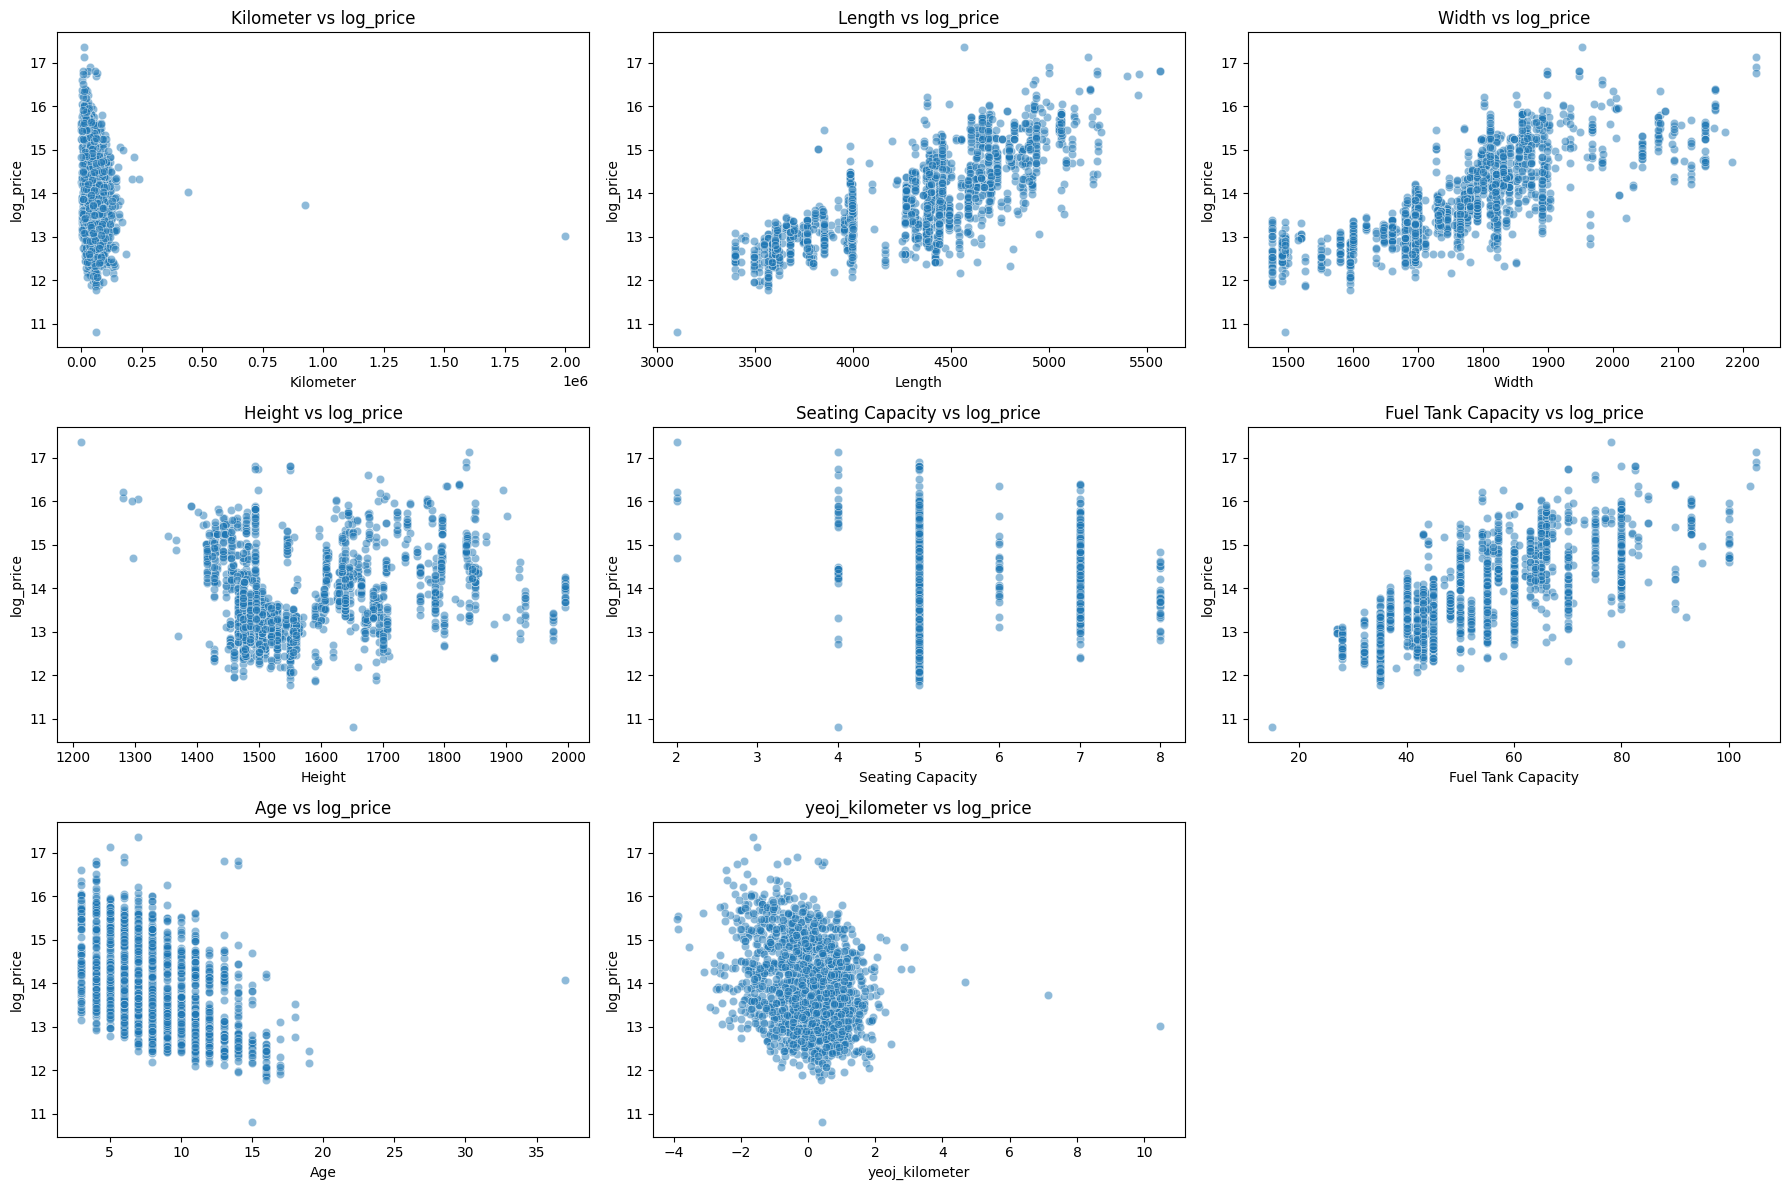

In [51]:
# Selecionando colunas numéricas (exceto Price e log_price)
numeric_cols = df_car.select_dtypes(include='number').columns.drop(['Price', 'log_price'], errors='ignore')

# Definindo número de colunas por linha
cols_per_row = 3
num_plots = len(numeric_cols)
num_rows = -(-num_plots // cols_per_row)  # ceil division

# Criando figura e subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, num_rows * 4))
axes = axes.flatten()

# Gerando os gráficos
for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=df_car, x=col, y='log_price', ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{col} vs log_price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('log_price')

# Apagando subplots extras (caso o número de variáveis não seja múltiplo de 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **Questão 9**
Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [59]:
# Variáveis independentes e dependente
X = df_car[['Fuel Tank Capacity']]
X = sm.add_constant(X)  # adiciona constante (intercepto)
y = df_car['log_price']

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo da regressão
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2251.
Date:                Mon, 05 May 2025   Prob (F-statistic):          2.47e-323
Time:                        23:04:56   Log-Likelihood:                -1832.1
No. Observations:                1874   AIC:                             3668.
Df Residuals:                    1872   BIC:                             3679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.4063      0

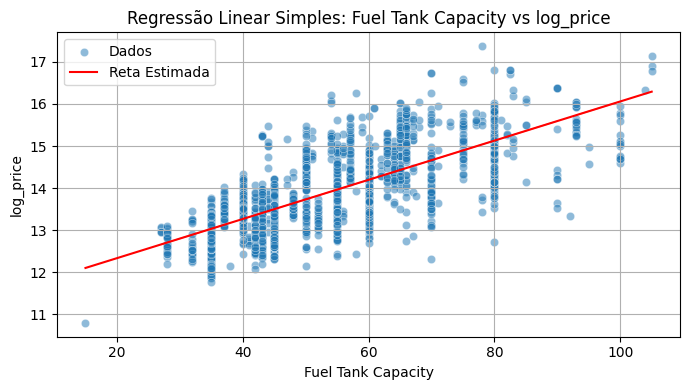

In [61]:
# Plot da reta ajustada
plt.figure(figsize=(7, 4))
sns.scatterplot(x=df_car['Fuel Tank Capacity'], y=df_car['log_price'], alpha=0.5, label='Dados')
sns.lineplot(x=df_car['Fuel Tank Capacity'], y=model.fittedvalues, color='red', label='Reta Estimada')
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('log_price')
plt.title('Regressão Linear Simples: Fuel Tank Capacity vs log_price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Questão 10**

Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples

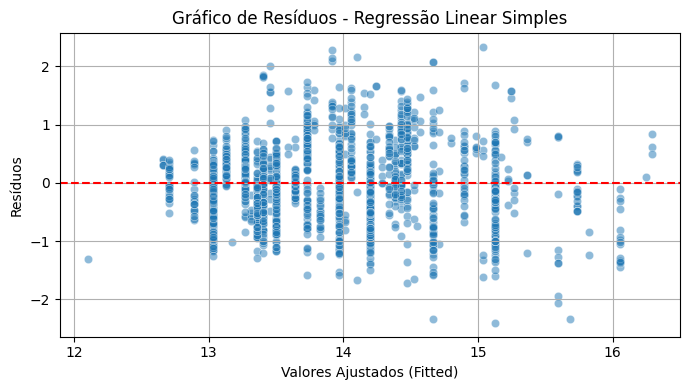

In [63]:
# Calcular resíduos
residuals = model.resid
fitted = model.fittedvalues

# Plot dos resíduos
plt.figure(figsize=(7, 4))
sns.scatterplot(x=fitted, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados (Fitted)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos - Regressão Linear Simples')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Questão 11**

. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo

In [65]:
# Selecionando variáveis explicativas
X_multi = df_car[['Kilometer', 'Fuel Tank Capacity', 'Age']]  # você pode adicionar mais colunas aqui
X_multi = sm.add_constant(X_multi)

# Variável dependente
y_multi = df_car['log_price']

# Ajuste do modelo
multi_model = sm.OLS(y_multi, X_multi).fit()

# Resumo do modelo
print(multi_model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1941.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        23:09:23   Log-Likelihood:                -1246.8
No. Observations:                1874   AIC:                             2502.
Df Residuals:                    1870   BIC:                             2524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.6139      0

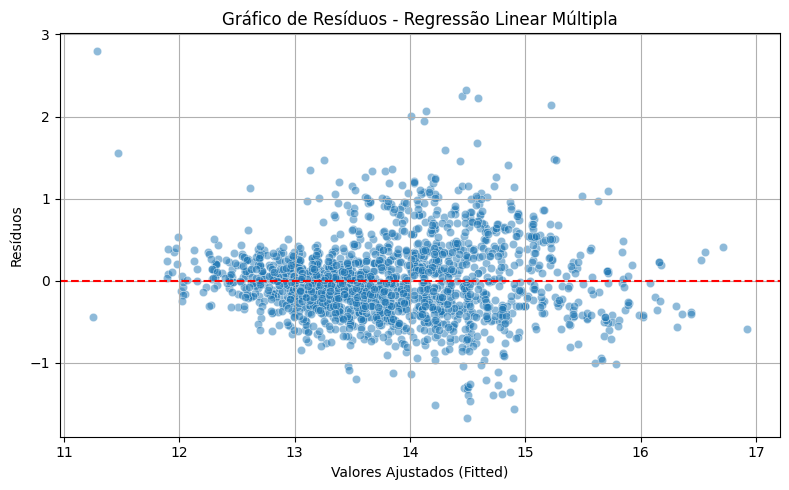

In [66]:
# Resíduos e valores ajustados
residuals_multi = multi_model.resid
fitted_multi = multi_model.fittedvalues

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_multi, y=residuals_multi, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados (Fitted)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos - Regressão Linear Múltipla')
plt.grid(True)
plt.tight_layout()
plt.show()
